# 중저가브랜드 가맹사업자 데이터분석
* 자료출처 - 공정거래위원회 가맹사업시스템 정보공개서(2020년 통계자료 기준 활용)
* 비교 브랜드 선정기준 : 대용량 사이즈 중저가 브랜드(메가,더벤티,빽다방), 기존 중저가 브랜드 상징업체(이디야)

# 필요 모듈 불러오기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# matplotlib 한글사용 코드
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
# plot출력시 경고 문구 삭제
import warnings
warnings.filterwarnings(action='ignore')

# 가맹사업자 가맹부담금 데이터 전처리

In [4]:
df_부담금 = pd.read_excel('./1차프로젝트 데이터/중저가브랜드_가맹사업자_가맹사업 부담금.xlsx')
df_부담금

브랜드  예치 가맹금  가입비(가맹비)   교육비   보증금    기타비용      합계  단위면적(3.3㎡)당 인테리어 비용  \
0    더벤티   12150      5500  1650  5000   50000   62150                 1760   
1    빽다방   11600      6050   550  5000   91201  102801                 1760   
2  컴포즈커피   12700      5500  2200  5000   70510   83210                 1767   
3    이디야   18200      9900  3300  5000  110930  129130                 2090   
4   메가커피    5300         0  3300  2000   51590   56890                 1581   

  기준점포면적(㎡)  인테리어 비용  
0       33     17600  
1       50     26400  
2       50     26510  
3       66     41800  
4       26     12650

In [6]:
# 가맹사업자 지역별 매출액 데이터 -> 엑셀로 브랜드별 매출데이터 전처리
df_매출액 = pd.read_excel('./1차프로젝트 데이터/중저가브랜드_가맹사업자_지역별_평균매출액.xlsx',sheet_name='전체합')
df_매출액new = df_매출액.rename(columns = {'면적(3.3㎡)당 평균매출액' : '평당 매출액'})
df_매출액new

브랜드  가맹점수   평균매출액  평당 매출액
0   메가커피  1184  286025   18949
1    이디야  2875  187040    6570
2  컴포즈커피   384  260853   19205
3    빽다방   721  298566   22310
4    더벤티   504  186973   14984

In [7]:
# 분석 필요데이터 전처리
시각화_df = df_부담금[['브랜드','예치 가맹금','합계','단위면적(3.3㎡)당 인테리어 비용']]
시각화_df.columns = ['브랜드','예치 가맹금','가맹부담금 합계','평당 인테리어 비용']
시각화_df

브랜드  예치 가맹금  가맹부담금 합계  평당 인테리어 비용
0    더벤티   12150     62150        1760
1    빽다방   11600    102801        1760
2  컴포즈커피   12700     83210        1767
3    이디야   18200    129130        2090
4   메가커피    5300     56890        1581

In [14]:
# 전처리 데이터 병합
사업성분석_df = pd.merge(df_매출액new,시각화_df,how='outer',on='브랜드')
사업성분석_df

브랜드  가맹점수   평균매출액  평당 매출액  예치 가맹금  가맹부담금 합계  평당 인테리어 비용
0   메가커피  1184  286025   18949    5300     56890        1581
1    이디야  2875  187040    6570   18200    129130        2090
2  컴포즈커피   384  260853   19205   12700     83210        1767
3    빽다방   721  298566   22310   11600    102801        1760
4    더벤티   504  186973   14984   12150     62150        1760

In [15]:
# 비교 원하는 데이터 추가 및 변환
사업성분석_df['평당 인테리어 비용 대비 매출액'] = 사업성분석_df['평당 매출액']/사업성분석_df['평당 인테리어 비용']
사업성분석_df['가맹부담금 대비 평당 매출액'] = 사업성분석_df['평당 매출액']/사업성분석_df['가맹부담금 합계']
사업성분석_df['가맹부담금 대비 평균 매출액'] = 사업성분석_df['평균매출액']/사업성분석_df['가맹부담금 합계']
사업성분석_df['가맹부담금 합계'] = 사업성분석_df['가맹부담금 합계'] + 사업성분석_df['예치 가맹금']
사업성분석_df

브랜드  가맹점수   평균매출액  평당 매출액  예치 가맹금  가맹부담금 합계  평당 인테리어 비용  \
0   메가커피  1184  286025   18949    5300     62190        1581   
1    이디야  2875  187040    6570   18200    147330        2090   
2  컴포즈커피   384  260853   19205   12700     95910        1767   
3    빽다방   721  298566   22310   11600    114401        1760   
4    더벤티   504  186973   14984   12150     74300        1760   

   평당 인테리어 비용 대비 매출액  가맹부담금 대비 평당 매출액  가맹부담금 대비 평균 매출액  
0          11.985452         0.333081         5.027685  
1           3.143541         0.050879         1.448463  
2          10.868704         0.230802         3.134876  
3          12.676136         0.217021         2.904310  
4           8.513636         0.241094         3.008415

# < 가맹사업자 브랜드별 사업성 비교(2020년 통계자료기준) >

## 브랜드별 점포 수 대비 수익성 비교

<AxesSubplot:xlabel='브랜드', ylabel='평균매출액'>

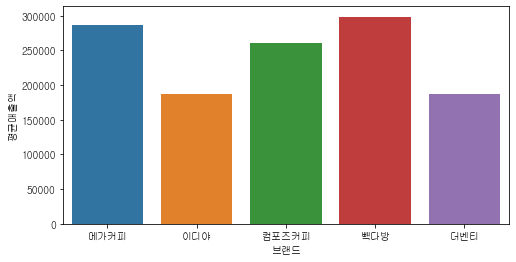

In [15]:
plt.figure(figsize=(8, 4))
sns.barplot(data=사업성분석_df , x='브랜드', y='평균매출액')

## 브랜드별 점포 크기 대비 수익성 비교

<AxesSubplot:xlabel='브랜드', ylabel='평당 매출액'>

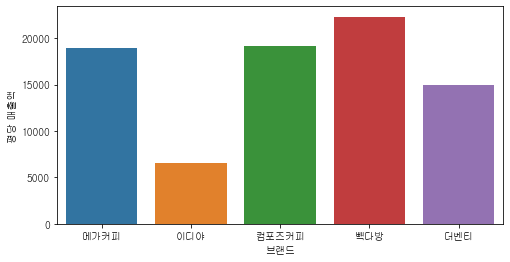

In [16]:
plt.figure(figsize=(8, 4))
sns.barplot(data=사업성분석_df , x='브랜드', y='평당 매출액')

## 가맹 부담금 항목별 합계(초기비용)

## 합계 항목 = 가입비(가맹비) + 교육비 + 보증금 + 기타비용 + 예치 가맹금

<AxesSubplot:xlabel='브랜드', ylabel='가맹부담금 합계'>

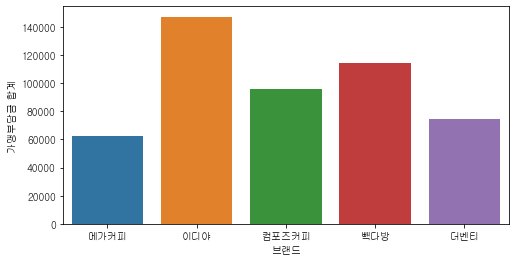

In [17]:
plt.figure(figsize=(8, 4))
sns.barplot(data=사업성분석_df ,x='브랜드',y='가맹부담금 합계')

## 평당 인테리어 소요 비용

### 평당 인테리어 소요 비용- > 높을수록 초기비용 회수 속도가 빠른 것으로 판단

<AxesSubplot:xlabel='브랜드', ylabel='평당 인테리어 비용'>

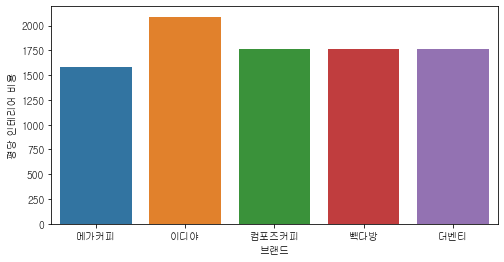

In [18]:
plt.figure(figsize=(8, 4))
sns.barplot(data=사업성분석_df ,x='브랜드',y='평당 인테리어 비용')

## 브랜드별 인테리어 평당 소요금액 대비 평당 수익성 비교 

<AxesSubplot:xlabel='브랜드', ylabel='평당 인테리어 비용 대비 매출액'>

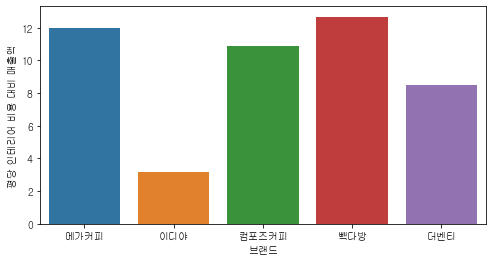

In [19]:
plt.figure(figsize=(8, 4))
sns.barplot(data=사업성분석_df ,x='브랜드',y='평당 인테리어 비용 대비 매출액')

## 초기 비용 대비 매출 비교

### 초기 비용 대비 매출 비교 -> 높을수록 초기투자자금 회수 속도가 빠른 것으로 판단

<AxesSubplot:xlabel='브랜드', ylabel='가맹부담금 대비 평당 매출액'>

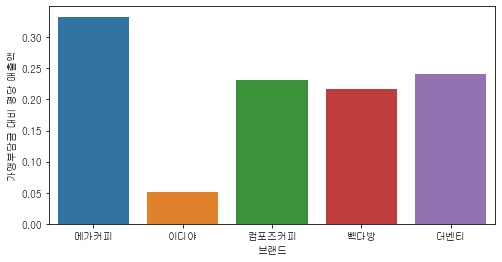

In [20]:
plt.figure(figsize=(8, 4))
sns.barplot(data=사업성분석_df ,x='브랜드',y='가맹부담금 대비 평당 매출액')

## 가맹부담금 대비 평균매출액

In [16]:
plt.figure(figsize=(8, 4))
sns.barplot(data=사업성분석_df ,x='브랜드',y='가맹부담금 대비 평균 매출액')

<AxesSubplot:xlabel='브랜드', ylabel='가맹부담금 대비 평균 매출액'>

## 분석결론
* 수익성 측면
        브랜드 개별 점포 수 대비 매출비교 -> 빽다방 > 메가커피 > 컴포즈커피 > 더벤티 > 이디야
        브랜드 개별 매장 크기 대비 매출비교 -> 빽다방 > 메가커피 > 컴포즈커피 > 더벤티 > 이디야
        
* 초기비용 측면(저렴 브랜드 순)
        가맹부담금 -> 메가커피 < 더벤티 < 컴포즈커피 < 빽다방 < 이디야
        인테리어비용 -> 메가커피 < 빽다방 = 더벤티 < 컴포즈커피 < 이디야
        
* 회수가능성 측면
        평당 인테리어 비용 대비 평당 매출액 : 빽다방 > 메가커피 > 컴포즈 > 더벤티 > 이디야
        가맹부담금 대비 평당 매출액 : 메가커피 > 더벤티 > 컴포즈커피 > 빽다방 > 이디야
        
* 가맹사업자의 시장진입 측면
        가맹부담금 대비 평균매출액 : 메가커피 > 컴포즈커피 > 더벤티 > 빽다방 > 이디야

### 순위 종합
* 메가 > 빽다방 > 컴포즈 > 더벤티 > 이디야 순
        해당 커피프렌차이즈들 중 새로운 사업을 시작한다고 했을 때 가맹사업자 입장에서 위의 순서로 효율성이 있을 것으로 분석